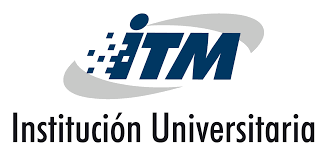

#ITM - Institución Universitaria
#Tema: Aprendizaje supervisado - ANN
#Juan Carlos Briñez de León

Problem:


MNIST classification.
https://www.kaggle.com/datasets/oddrationale/mnist-in-csv

In [ ]:
# Only necessary if you want to use the Google Colab Notebooks
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#1. Importando dataset.
import cv2 # OpenCV para computer vision
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #Para graficar

#Cargando datos MNIST dataset with csv from kaggle
#dataset_tr = pd.read_csv(r'/content/drive/MyDrive/Ponencia IA/Material de apoyo/6. Redes Neuronales/ANN_MNIST/mnist_train.csv')
#dataset_ts = pd.read_csv(r'/content/drive/MyDrive/Ponencia IA/Material de apoyo/6. Redes Neuronales/ANN_MNIST/mnist_test.csv')
#dataset_ts = np.array(dataset_ts)
#dataset_tr = np.array(dataset_tr)

In [ ]:
## Importing mnist from tensorflow.keras.datasets
from tensorflow.keras.datasets import mnist

# Load data directly
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape if needed for traditional ML
dataset_tr = x_train.reshape(x_train.shape[0], -1)
dataset_ts = x_test.reshape(x_test.shape[0], -1)

In [ ]:
#2. Dividing dataset into input (X) and output (Y) variables
X_train = dataset_tr[:,1:785]
Y_train = dataset_tr[:,0]
X_test = dataset_ts[:,1:785]
Y_test = dataset_ts[:,0]
print(X_train.shape)
print(X_test.shape)

In [ ]:
#4. Data scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

===================================================================

In [ ]:
# Cargando modelos clásicos de IA para clasificación
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings("ignore")

# Declarar modelos
modelos = {
    "Naive Bayes": GaussianNB(),
    "k-NN": KNeighborsClassifier(),
    "LDA": LinearDiscriminantAnalysis(),
    "QDA": QuadraticDiscriminantAnalysis(),
    "Árbol de Decisión": DecisionTreeClassifier(),
    "Bosque Aleatorio": RandomForestClassifier(),
    "SVM": SVC(),
    "Red Neuronal (MLP)": MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=500)
}

# Definiendo métricas de evaluación
from sklearn.metrics import classification_report, accuracy_score

# Entrenando modelos
resultados = {}
for nombre, modelo in modelos.items():
    modelo.fit(X_train, Y_train)
    Y_pred = modelo.predict(X_test)
    resultados[nombre] = {
        "Exactitud": accuracy_score(Y_test, Y_pred),
        "Reporte de Clasificación": classification_report(Y_test, Y_pred)
    }

# Análisis de desempeño
for nombre, resultado in resultados.items():
    print(f"Modelo: {nombre}")
    print(f"Exactitud: {resultado['Exactitud']:.4f}")
    print("Reporte de Clasificación:")
    print(resultado["Reporte de Clasificación"])
    print("-" * 50)

==================================================

Probando el **modelo** ANN en imagen del dataset

In [ ]:
modelo_red_neuronal = modelos["Red Neuronal (MLP)"]
#Showing the dataset images (Para entender el dataset y las predicciones)
X_test = dataset_ts[:,1:785]
Y_test = dataset_ts[:,0]

Index = 9550

Datos_Imagen = np.zeros((1,784))
Datos_Imagen = X_test[Index,:].reshape(1, -1)
Imagen = Datos_Imagen.reshape(28,28)

Prediccion = modelo_red_neuronal.predict(Datos_Imagen)

plt.imshow(Imagen[:,:].astype('uint8'),cmap='gray',vmin=0, vmax=255)
print('La etiqueta de este número es: ',Prediccion)

======================================================

Probando en imágenes reales

In [ ]:
#Reviewing an experimental case
Imagen_Exp = cv2.imread(r'/content/drive/MyDrive/Ponencia IA/Material de apoyo/6. Redes Neuronales/ANN_MNIST/Img_prueba_2.jpg')#Lee
plt.imshow(Imagen_Exp[:,:,[2,1,0]].astype('uint8'),vmin=0, vmax=255)
plt.show()

In [ ]:
#Processing the experimental image
Img_gray = cv2.cvtColor(Imagen_Exp, cv2.COLOR_BGR2GRAY)
_,Binaria = cv2.threshold(Img_gray, 160, 255, cv2.THRESH_BINARY_INV)

kernel_A = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(10,10))
Bin_1 = cv2.morphologyEx(Binaria.astype('uint8'), cv2.MORPH_CLOSE, kernel_A)
kernel_B = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
Bin_2= cv2.morphologyEx(Bin_1.astype('uint8'), cv2.MORPH_OPEN, kernel_B)
plt.imshow(Bin_2.astype('uint8'),cmap='gray',vmin=0, vmax=255)
plt.show()

print('')
(Bordes,_) =cv2.findContours(Bin_2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print('Usted tiene', len(Bordes), ' regiones en la imagen' )

In [ ]:
#Cropping every number into the image
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Recorrer los contornos detectados (Bordes)
for i in range(len(Bordes)):
    Caso = Bordes[i]
    x, y, w, h = cv2.boundingRect(Caso)

    # Recortar la imagen del número detectado
    New_img = Bin_2[y:y+h, x:x+w]

    # Redimensionar a 18x18
    New_img_0 = cv2.resize(New_img, (18, 18), interpolation=cv2.INTER_AREA)

    # Crear un fondo negro de 28x28 y centrar la imagen de 18x18
    New_img_A = np.zeros((28, 28))
    New_img_A[5:23, 5:23] = New_img_0  # Centrar el número

    # Normalizar la imagen (convertir a valores entre 0 y 1)
    New_img_A = New_img_A.flatten().reshape(1, -1) / 255.0  # Convertir a (1, 784)

    # Mostrar la imagen procesada
    plt.imshow(New_img_A.reshape(28, 28), cmap='gray', vmin=0, vmax=1)
    plt.show()

    # Hacer la predicción con el modelo de red neuronal
    Prediccion = modelo_red_neuronal.predict(New_img_A)

    print("La predicción es:", Prediccion[0])  # Mostrar el número predicho
    print(" ")

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Copia de la imagen original para dibujar los bounding boxes
imagen_con_bb = Imagen_Exp.copy()

# Recorrer los contornos detectados (Bordes)
for i in range(len(Bordes)):
    Caso = Bordes[i]
    x, y, w, h = cv2.boundingRect(Caso)

    # Recortar la imagen del número detectado
    New_img = Bin_2[y:y+h, x:x+w]

    # Redimensionar a 18x18
    New_img_0 = cv2.resize(New_img, (18, 18), interpolation=cv2.INTER_AREA)

    # Crear un fondo negro de 28x28 y centrar la imagen de 18x18
    New_img_A = np.zeros((28, 28))
    New_img_A[5:23, 5:23] = New_img_0  # Centrar el número

    # Normalizar la imagen (convertir a valores entre 0 y 1)
    New_img_A = New_img_A.flatten().reshape(1, -1) / 255.0  # Convertir a (1, 784)

    # Hacer la predicción con el modelo de red neuronal
    Prediccion = modelo_red_neuronal.predict(New_img_A)[0]

    # Dibujar el bounding box en la imagen original
    cv2.rectangle(imagen_con_bb, (x, y), (x + w, y + h), (0, 0, 255), 2)

    # Escribir la predicción sobre la imagen
    cv2.putText(imagen_con_bb, str(Prediccion), (x, y - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0, 0, 0), 4, cv2.LINE_AA)

# Mostrar la imagen original con todas las predicciones y bounding boxes
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(imagen_con_bb, cv2.COLOR_BGR2RGB))  # Convertir BGR a RGB para matplotlib
plt.title("Imagen con Bounding Boxes y Predicciones")
plt.axis("off")
plt.show()